In [2]:
using Plot

using Kraft

using GSEA

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4105188473830886424\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8537077573951898937\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4105188473830886424\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling GSEA [d7bef1b9-4643-4ed1-9ceb-ed43dd382ec0]
└ @ Base loading.jl:1278


In [3]:
use_style!()

;

In [4]:
element_, element_score_, set_element_ = make_benchmark("card")

;

In [5]:
using Printf: @sprintf

using Plotly: Layout, attr, plot, scatter

In [6]:
element_::Vector{String}

element_score_::Vector{Float64}

set_element_::Vector{String}

width = 800

height = 500

line_width = 2

title_text = "Set Enrichment"

title_font_size = 24

element_value_name = "Element Score"

axis_title_font_size = 12

;

-0.09090909090909091
-0.18181818181818182
-0.2727272727272727

11.0
0.21531100478468904
0.12440191387559812

8.0
0.4545454545454545
0.36363636363636354
0.2727272727272726
0.18181818181818168
0.09090909090909077
-1.3877787807814457e-16


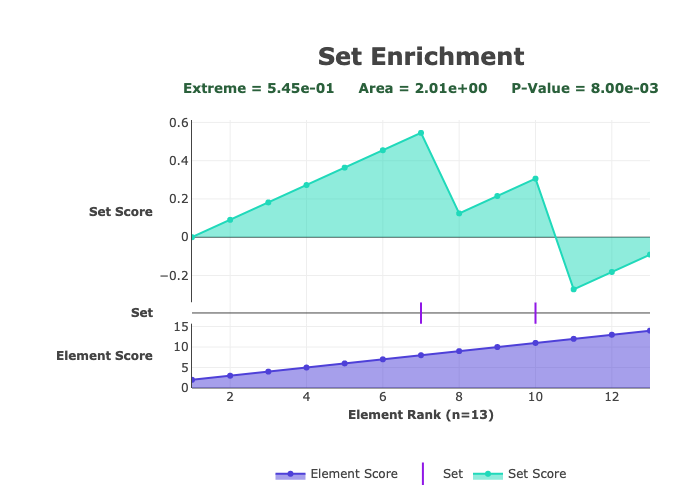

In [7]:
n_element = length(element_)

yaxis1_domain = (0.0, 0.24)

yaxis2_domain = (0.24, 0.32)

yaxis3_domain = (0.32, 1.0)

annotation_template = attr(
    xref = "paper",
    yref = "paper",
    yanchor = "middle",
    showarrow = false,
)

x_annotation_template = merge(
    annotation_template,
    attr(xanchor = "center", x = 0.5),
)

y_annotation_template = merge(
    annotation_template,
    attr(xanchor="right", x = -0.08, font_size = axis_title_font_size),
)

layout = Layout(
    width = width,
    height = height,
    margin_l = width * 0.24,
    margin_t = height * 0.24,
    
    legend_orientation = "h",
    legend_x = 0.5,
    legend_y = -0.32,
    legend_xanchor = "center",
    legend_yanchor = "middle",
    
    xaxis1_zeroline = false,
    #xaxis1_showspikes = true,
    #xaxis1_spikemode = "across",
    #xaxis1_spikedash = "solid",
    
    yaxis3_domain = yaxis3_domain,
    yaxis3_showline = true,
    
    yaxis2_domain = yaxis2_domain,
    yaxis2_showticklabels = false,
    yaxis2_showgrid = false,
    
    yaxis1_domain = yaxis1_domain,
    yaxis1_showline = true,
    annotations = [
        merge(
            x_annotation_template,
            attr(y = 1.24, text = "<b>$title_text</b>", font_size = title_font_size),
        ),
        merge(
            x_annotation_template,
            attr(y = -0.1, text = "<b>Element Rank (n=$n_element)</b>",
            ),
        ),
        merge(
            y_annotation_template,
            attr(y = get_center(yaxis3_domain), text = "<b>Set Score</b>"),
        ),
        merge(
            y_annotation_template,
            attr(y = get_center(yaxis2_domain), text = "<b>Set</b>"),
        ),
        merge(
            y_annotation_template,
            attr(y = get_center(yaxis1_domain), text = "<b>$element_value_name</b>"),
        ),
    ],
)

x = 1:n_element

element_score_, element_ = sort_like((element_score_, element_))

element_score_trace = scatter(
    name = "Element Score",
    x = x,
    y = element_score_,
    text = element_,
    line_width = line_width,
    line_color = "#4e40d8",
    fill = "tozeroy",
)

is_ = check_is(element_, set_element_)

set_element_bit = BitVector(is_)

set_element_trace = scatter(
    name = "Set",
    yaxis = "y2",
    x = x[set_element_bit],
    y = zeros(Int64(sum(is_))),
    text = element_[set_element_bit],
    mode = "markers",
    marker_symbol = "line-ns-open",
    marker_size = height * (yaxis2_domain[2] - yaxis2_domain[1]) * 0.64,
    marker_line_width = line_width,
    marker_color = "#9017e6",
    hoverinfo = "name+x+text",
)

set_score_, extreme, area = score_set_ks(element_, element_score_, set_element_)

p_value = 0.008

extreme = @sprintf "%.2e" extreme

area = @sprintf "%.2e" area

p_value = @sprintf "%.2e" p_value

push!(
    layout["annotations"],
    merge(
        x_annotation_template,
        attr(
            y = 1.12,
            text = join(("<b>Extreme = $extreme</b>", "<b>Area = $area</b>", "<b>P-Value = $p_value</b>"), "     "),
            font_size = title_font_size * 0.56,
            font_color = "#2a603b",
        ),
    ),
)

set_score_trace = scatter(
    name = "Set Score",
    yaxis = "y3",
    x = x,
    y = set_score_,
    text = element_,
    line_width = line_width,
    line_color = "#20d9ba",
    fill = "tozeroy",
)

plot([element_score_trace, set_element_trace, set_score_trace], layout)